In [9]:
from pathlib import Path
import re
import numpy as np
from scipy import signal
from nilearn.connectome import ConnectivityMeasure

def butter_bandpass(cutoff, fs, order=5):
    normal_cutoff = [cutoff[0], cutoff[1]]
    b, a = signal.butter(order, normal_cutoff, btype='band', analog=False, fs=fs)
    return b, a

def butter_bandpass_filter(data, cutoff, fs, order=5):
    b, a = butter_bandpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

tsdir = '/home/anton/Documents/Tulane/Research/UKBB/Cypress/ts'

tr = 0.735
ps = dict()
con = ConnectivityMeasure(kind='partial correlation')

a,b = np.triu_indices(264,1)

for ts in Path(tsdir).iterdir():
    m = re.match('(\d+)_(\d+)_(\d)_0_ts.csv', ts.name)
    if not m:
        continue
    subid = int(m.group(1))
    field = int(m.group(2))
    scannum = int(m.group(3))
    if field != 20249:
        continue
    if scannum != 3:
        continue
    data = np.genfromtxt(str(ts), delimiter=',')
    try:
        ts1 = butter_bandpass_filter(data, [0.01, 0.15], 1/tr)
        ts1 = ts1.T
        ts1 = np.expand_dims(ts1, 0)
        p = con.fit_transform(ts1)[0]
        if np.sum(np.isnan(p)) > 0:
            print(f'Bad sub {subid}')
            continue
#         ps[subid] = p[a,b]
        ps[subid] = remap(p)[a,b]
        if len(ps) % 100 == 0:
            print(f'Done {len(ps)}')
    except:
        print(f'Bad sub {subid}')
        continue
    
print('Complete')

Done 100
Done 200
Done 300
Done 400
Done 500
Done 600
Done 700
Done 800
Done 900
Done 1000
Done 1100
Done 1200
Done 1300
Done 1400
Done 1500
Done 1600
Done 1700
Done 1800
Done 1900
Done 2000
Done 2100
Done 2200
Bad sub 4413609
Done 2300
Done 2400
Done 2500
Complete


In [1]:
ours2orig = [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 254, 41, 42, 43, 44, 45,
46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 85,
86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103,
104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 136, 138, 132,
133, 134, 135, 220, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152,
153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 185, 186,
187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
217, 218, 219, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
233, 137, 234, 235, 236, 237, 238, 239, 240, 241, 250, 251, 255, 256, 257,
258, 259, 260, 261, 262, 263, 242, 243, 244, 245, 0, 1, 2, 3, 4, 5, 6, 7, 8,
9, 10, 11, 83, 84, 131, 139, 140, 141, 181, 182, 183, 184, 246, 247, 248,
249, 252, 253]

def vec2mat(v):
    a,b = np.triu_indices(264,1)
    m = np.zeros((264,264))
    m[a,b] = v
    return m+m.T

def remap(fc, roimap=ours2orig):
    fc = fc[roimap,:]
    fc = fc[:,roimap]
    return fc

print('Complete')

Complete


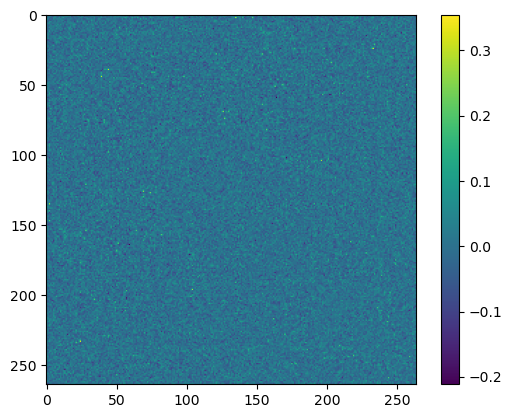

In [6]:
import matplotlib.pyplot as plt
import random

plt.imshow(remap(vec2mat(ps[random.choice(list(ps.keys()))])))
plt.colorbar()
plt.show()

In [1]:
# Read the phenotype info

import pandas as pd

csvname = '/run/media/anton/AntonData1/UKB_MRI_data_11092022/UKB_Phenotypes/project3_Anton/DataSet_11162022.csv'
df = pd.read_csv(csvname)
df

,f.eid,f.21003.0.0,f.21003.1.0,f.21003.2.0,f.21003.3.0,f.21022.0.0,f.22001.0.0,f.25750.2.0,f.25750.3.0,f.25751.2.0,f.25751.3.0,f.25752.2.0,f.25752.3.0,f.25753.2.0,f.25753.3.0,f.25754.2.0,f.25754.3.0,f.25755.2.0,f.25755.3.0
0,1000010,50.0,NaN,NaN,NaN,50.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000028,52.0,NaN,NaN,NaN,52.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000034,56.0,NaN,NaN,NaN,56.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000045,43.0,NaN,NaN,NaN,43.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000052,61.0,NaN,NaN,NaN,61.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502481,6024820,68.0,NaN,NaN,NaN,68.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502482,6024833,61.0,NaN,NaN,NaN,61.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502483,6024847,64.0,NaN,NaN,NaN,64.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502484,6024859,60.0,NaN,NaN,NaN,60.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
from pathlib import Path
import re
import numpy as np

basedir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/UKB/'

N = 500
subs = []
x = np.zeros((N, 34716))
j = 0

for i,fc in enumerate(Path(f'{basedir}/fc').iterdir()):
    m = re.match('(\d+)_task-(\d+)-(\d)_fc.npy', fc.name)
    if not m:
        continue
    subid = int(m.group(1))
    field = int(m.group(2))
    scannum = int(m.group(3))
    try:
        int(df[df['f.eid'] == subid]['f.22001.0.0'])
    except:
        continue
    if scannum != 2:
        continue
    x[j] = np.load(str(fc))
    j += 1
    subs.append(subid)
    if j >= N:
        break
    if i % 1000 == 0:
        print(f'Done {i}')
        
print('Complete')

Done 0
Complete


In [28]:
from math import isnan

# subs = list(ps.keys())
ages = []
sex = []
# x = []
demo = {'f_22001_0_0': {}, 'f_21003_2_0': {}}
for s in subs:
    sex.append(int(df[df['f.eid'] == s]['f.22001.0.0']))
    ages.append(float(df[df['f.eid'] == s]['f.21003.2.0']))
    if not isnan(sex[-1]):
        demo['f_22001_0_0'][s] = sex[-1]
    demo['f_21003_2_0'][s] = ages[-1]
#     x.append(ps[s])
# x = np.stack(x)
ages = np.array(ages)
sex = np.array(sex)

print(x.shape, ages.shape, sex.shape)

(500, 34716) (500,) (500,)


In [64]:
ages

array([58., 62., 69., ..., 65., 61., 67.])

In [4]:
import sys

latsimdir = '/home/anton/Documents/Tulane/Research/LatentSimilarity'

if latsimdir not in sys.path:
    sys.path.append(latsimdir)

In [31]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split
from latsim import LatSimClf, LatSimReg

def rmse(xhat, x):
    return np.mean((xhat-x)**2)**0.5

errs = []
nullerrs = []

for _ in range(20):
    xtr, xt, ytr, yt = train_test_split(x, sex, stratify=sex, train_size=0.8)
    print('Done split')

    # mu = np.mean(ytr)
    # yt = yt-mu
    # ytr = ytr-mu

#     reg = LatSimReg().fit(xtr, ytr)
#     reg = Ridge(alpha=1000).fit(xtr, ytr)
    reg = LatSimClf().fit(xtr, ytr)
#     reg = LogisticRegression(max_iter=1000).fit(xtr, ytr)
    yhat = reg.predict(xt)
#     err = rmse(yhat, yt)
#     nullerr = rmse(np.mean(ytr), yt)
    err = np.mean(yhat == yt)
    nullerr = np.mean(yt)
    if nullerr < 0.5:
        nullerr = 1-nullerr
    print(err)
    print(nullerr)
    errs.append(err)
    nullerrs.append(nullerr)
    
print(np.mean(errs), np.std(errs))
print(np.mean(nullerrs), np.std(nullerrs))

Done split
0.78
0.55
Done split
0.77
0.55
Done split
0.78
0.55
Done split
0.78
0.55
Done split
0.76
0.55
Done split
0.81
0.55
Done split
0.76
0.55
Done split
0.7
0.55
Done split
0.77
0.55
Done split
0.76
0.55
Done split
0.8
0.55
Done split
0.69
0.55
Done split
0.76
0.55
Done split
0.79
0.55
Done split
0.74
0.55
Done split
0.74
0.55
Done split
0.78
0.55
Done split
0.69
0.55
Done split
0.73
0.55
Done split
0.82
0.55
0.7605000000000001 0.03570364127088443
0.5500000000000002 1.1102230246251565e-16


In [3]:
# Write to ImageNomer directory

import pickle

basedir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/anton/cohorts/UKB/'

# pickle.dump(demo, open(f'{basedir}/demographics.pkl', 'wb'))

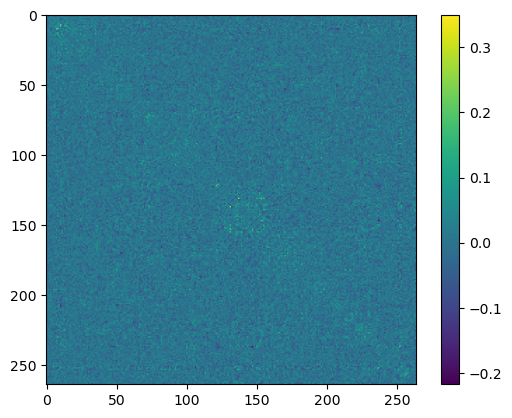

In [10]:
import matplotlib.pyplot as plt

for sub, p in ps.items():
    plt.imshow(vec2mat(p))
    plt.colorbar()
    plt.show()
    break

In [11]:
basedir = '/home/anton/Documents/Tulane/Research/ImageNomer/data/UKB2/conn/'
for i,sub in enumerate(ps):
    np.save(f'{basedir}/{sub}_task-20249-3_pc.npy', ps[sub])
    if i % 1000 == 0:
        print(f'Done {i}')
    
print('Complete')

Done 0
Done 1000
Done 2000
Complete
